<a href="https://colab.research.google.com/github/claraferreirabatista/processo_seletivo/blob/main/Leads_Analisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTANDO OS DADOS

In [1]:
from google.colab import files
uploaded = files.upload()


Saving leads_gerados.csv to leads_gerados (23).csv
Saving verba.csv to verba (23).csv


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate



In [3]:
#carregamento da planilha
leads_gerados = pd.read_csv('leads_gerados.csv')

## Contagem de leads por Campanha

In [4]:
contagem_campanhas = leads_gerados['Campanha'].value_counts()
total_leads = len(leads_gerados)
porcentagem_campanhas = contagem_campanhas / total_leads * 100
print("Contagem de leads por tipo de campanha:")
for campanha, contagem in contagem_campanhas.items():
    print(f"{campanha}: {contagem}")

print("\nPorcentagem de leads por tipo de campanha:")
for campanha, percentual in porcentagem_campanhas.items():
    print(f"{campanha}: {percentual:.2f}%")


Contagem de leads por tipo de campanha:
campanha-cupom: 123
ebook: 100
campanha-institucional: 94
webinar: 88

Porcentagem de leads por tipo de campanha:
campanha-cupom: 30.37%
ebook: 24.69%
campanha-institucional: 23.21%
webinar: 21.73%


## Relacionamento entre campanha e mídia

In [5]:
# Contagem de cada campanha por tipo de mídia
contagem = leads_gerados.groupby(['Campanha', 'Mídia']).size().reset_index(name='Contagem')
tabela_formatada = tabulate(contagem, headers='keys', tablefmt='pretty')
print(tabela_formatada)

+----+------------------------+-----------------+----------+
|    |        Campanha        |      Mídia      | Contagem |
+----+------------------------+-----------------+----------+
| 0  |     campanha-cupom     | busca-orgânica  |    18    |
| 1  |     campanha-cupom     |     e-mail      |    20    |
| 2  |     campanha-cupom     |   google ads    |    52    |
| 3  |     campanha-cupom     |    meta ads     |    14    |
| 4  |     campanha-cupom     | social-orgânico |    18    |
| 5  |     campanha-cupom     |     uknown      |    1     |
| 6  | campanha-institucional |   Link-da-bio   |    12    |
| 7  | campanha-institucional | busca-orgânica  |    14    |
| 8  | campanha-institucional |     e-mail      |    23    |
| 9  | campanha-institucional |   google ads    |    25    |
| 10 | campanha-institucional |    meta ads     |    11    |
| 11 | campanha-institucional |     uknown      |    9     |
| 12 |         ebook          |   Link-da-bio   |    16    |
| 13 |         ebook    

## **Heatmap**: Relação entre Campanhas e Tipos de Mídia

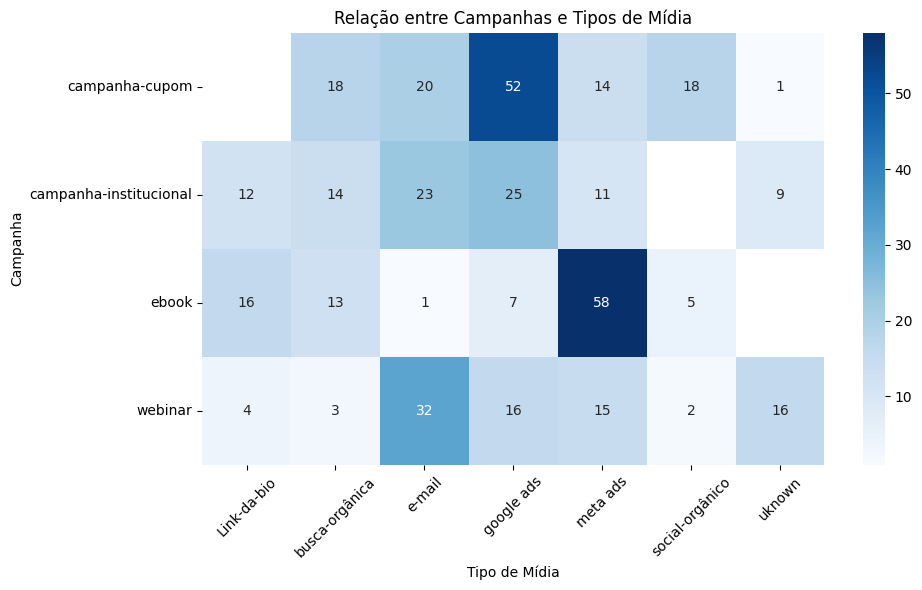

In [6]:
# Contagem de cada campanha por tipo de mídia
contagem = leads_gerados.groupby(['Campanha', 'Mídia']).size().reset_index(name='Contagem')

# Criando uma tabela pivô para facilitar a criação do heatmap
pivot_table = contagem.pivot(index='Campanha', columns='Mídia', values='Contagem')

# Criando o heatmap com Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Relação entre Campanhas e Tipos de Mídia')
plt.xlabel('Tipo de Mídia')
plt.ylabel('Campanha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relacionamento entre campanha e perfis

## Contagem de leads por perfil

In [7]:
# Contagem de leads por perfil
contagem_por_perfil = leads_gerados['Perfil'].value_counts().reset_index()
contagem_por_perfil.columns = ['Perfil', 'Contagem de Leads']

# Relacionamento entre campanhas e perfis
relacao_campanha_perfil = leads_gerados.groupby(['Campanha', 'Perfil']).size().reset_index(name='Contagem')

# Exibindo os resultados com tabulate
print("Contagem de leads por perfil:")
print(tabulate(contagem_por_perfil, headers='keys', tablefmt='psql'))

Contagem de leads por perfil:
+----+---------------------+---------------------+
|    | Perfil              |   Contagem de Leads |
|----+---------------------+---------------------|
|  0 | 100 mil até 300 mil |                 139 |
|  1 | Abaixo de 100 mil   |                 131 |
|  2 | 300 mil até 500 mil |                  62 |
|  3 | 500 mil até 1milhão |                  53 |
|  4 | Acima de 1milhão    |                  20 |
+----+---------------------+---------------------+


In [8]:
print("\nRelacionamento entre campanhas e perfis:")
print(tabulate(relacao_campanha_perfil, headers='keys', tablefmt='psql'))


Relacionamento entre campanhas e perfis:
+----+------------------------+---------------------+------------+
|    | Campanha               | Perfil              |   Contagem |
|----+------------------------+---------------------+------------|
|  0 | campanha-cupom         | 100 mil até 300 mil |         27 |
|  1 | campanha-cupom         | 300 mil até 500 mil |         22 |
|  2 | campanha-cupom         | Abaixo de 100 mil   |         74 |
|  3 | campanha-institucional | 100 mil até 300 mil |         21 |
|  4 | campanha-institucional | 300 mil até 500 mil |         18 |
|  5 | campanha-institucional | 500 mil até 1milhão |         27 |
|  6 | campanha-institucional | Abaixo de 100 mil   |         18 |
|  7 | campanha-institucional | Acima de 1milhão    |         10 |
|  8 | ebook                  | 100 mil até 300 mil |         61 |
|  9 | ebook                  | 300 mil até 500 mil |         11 |
| 10 | ebook                  | 500 mil até 1milhão |         14 |
| 11 | ebook        

## **Histograma**: Análise de Porcentagem de Leads por Classificação e Campanha

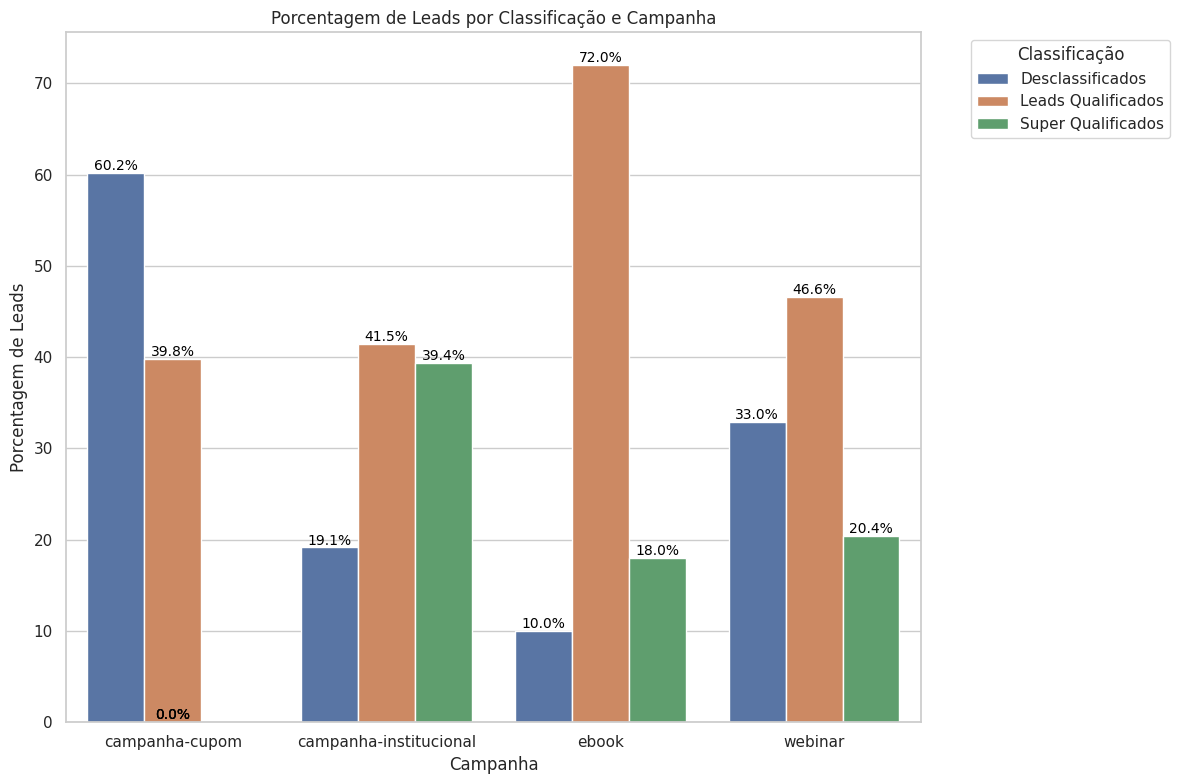

In [9]:
df = relacao_campanha_perfil.copy()
condicoes = [
    df['Perfil'].isin(['100 mil até 300 mil', '300 mil até 500 mil']),
    df['Perfil'].isin(['500 mil até 1milhão', 'Acima de 1milhão']),
    df['Perfil'] == 'Abaixo de 100 mil'
]
escolhas = ['Leads Qualificados', 'Super Qualificados', 'Desclassificados']
df['Classificação'] = np.select(condicoes, escolhas, default='')
df = df.groupby(['Campanha', 'Classificação'])['Contagem'].sum().reset_index()
df['Total_por_Campanha'] = df.groupby('Campanha')['Contagem'].transform('sum')
df['Porcentagem'] = (df['Contagem'] / df['Total_por_Campanha']) * 100
df['Porcentagem'] = df['Porcentagem'].round(2)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Campanha', y='Porcentagem', hue='Classificação', data=df)
plt.xlabel('Campanha')
plt.ylabel('Porcentagem de Leads')
plt.title('Porcentagem de Leads por Classificação e Campanha')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
leads_gerados = pd.read_csv('leads_gerados.csv')
verba = pd.read_csv('verba.csv')


# **Qual campanha gerou o CPL (Custo por Lead) mais baixo? Para conseguir calcular o CPL você deve terminar de preencher a aba "Verba" da planilha.**

## Contagem de Lead Gerados

In [11]:
leads_gerados_copy = leads_gerados.copy()

leads_gerados_copy['Data'] = pd.to_datetime(leads_gerados_copy['Data'], format='%d/%m/%Y')

meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio']
campanhas = ['ebook', 'campanha-cupom', 'campanha-institucional', 'webinar']
leads_por_mes_campanha = {mes: {campanha: 0 for campanha in campanhas} for mes in meses}

for month_idx, mes in enumerate(meses, start=1):
    for campanha in campanhas:
        filtered_data = leads_gerados_copy[(leads_gerados_copy['Data'].dt.month == month_idx) &
                                           (leads_gerados_copy['Campanha'] == campanha)]

        count_leads = filtered_data.shape[0]
        leads_por_mes_campanha[mes][campanha] = count_leads

for idx, row in verba.iterrows():
    mes = row['Período']
    campanha = row['Campanha']
    verba.at[idx, 'Leads gerados'] = leads_por_mes_campanha[mes][campanha]

verba['Leads gerados'] = verba['Leads gerados'].astype(int)


## Cálculo do CPL

In [12]:
for i in range(len(verba['Leads gerados'])):
    investimento_total = float(verba['Investimento total'][i].replace('R$', '').replace('.', '').replace(',', '.'))
    leads_gerados = verba['Leads gerados'][i]
    cpl = investimento_total / leads_gerados

    verba['CPL\nCusto por Lead'][i] = f"R$ {cpl:.2f}".replace('.', ',')
verba.rename(columns={'CPL\nCusto por Lead': 'CPL'}, inplace=True)


# Tabela Verba

- **Período**: Mês em que a campanha foi realizada.
- **Campanha**: Tipo de campanha realizada (como ebook, campanha-cupom, campanha-institucional, webinar, etc.).
- **Investimento Google Ads**: Valor investido em Google Ads para a campanha específica.
- **Investimento Meta Ads**: Valor investido em Meta Ads (ou outra plataforma de anúncios) para a campanha específica.
- **Investimento total**: Investimento total combinado em ambas as plataformas para a campanha.
- **Leads gerados**: Número de leads (potenciais clientes) gerados pela campanha.
- **CPL**: Custo por lead, calculado como o investimento total dividido pelo número de leads gerados.



In [13]:
verba

,Período,Campanha,Investimento Google Ads,Investimento Meta Ads,Investimento total,Leads gerados,CPL
0,janeiro,ebook,"R$ 1.347,60","R$ 1.470,60","R$ 2.818,20",21,"R$ 134,20"
1,janeiro,campanha-cupom,"R$ 1.180,44","R$ 2.835,44","R$ 4.015,88",28,"R$ 143,42"
2,janeiro,campanha-institucional,"R$ 1.905,65","R$ 1.815,65","R$ 3.721,30",19,"R$ 195,86"
3,janeiro,webinar,"R$ 546,80","R$ 558,80","R$ 1.105,60",17,"R$ 65,04"
4,fevereiro,ebook,"R$ 723,45","R$ 821,45","R$ 1.544,90",19,"R$ 81,31"
5,fevereiro,campanha-cupom,"R$ 2.344,22","R$ 2.433,22","R$ 4.777,44",26,"R$ 183,75"
6,fevereiro,campanha-institucional,"R$ 1.854,65","R$ 2.698,23","R$ 4.552,88",19,"R$ 239,63"
7,fevereiro,webinar,"R$ 700,92","R$ 739,45","R$ 1.440,37",16,"R$ 90,02"
8,março,ebook,"R$ 1.289,90","R$ 1.389,89","R$ 2.679,79",21,"R$ 127,61"
9,março,campanha-cupom,"R$ 658,97","R$ 1.467,89","R$ 2.126,86",23,"R$ 92,47"


## Soma Total de CPL por Campanha

In [14]:
verba_copy = verba.copy()
verba_copy['CPL'] = verba_copy['CPL'].apply(lambda x: float(x.replace('R$ ', '').replace(',', '.')))
total_cpl_por_campanha = verba_copy.groupby('Campanha')['CPL'].sum().reset_index()
total_cpl_por_campanha['CPL total'] = total_cpl_por_campanha['CPL'].apply(lambda x: f'R$ {x:.2f}')
total_cpl_por_campanha = total_cpl_por_campanha[['Campanha', 'CPL total']]

total_cpl_por_campanha

,Campanha,CPL total
0,campanha-cupom,R$ 603.98
1,campanha-institucional,R$ 1304.83
2,ebook,R$ 617.15
3,webinar,R$ 399.92


# Qual campanha gerou o CPL (Custo por Lead) mais baixo?

In [15]:
# Ordenando pelo CPL
verba_sorted = verba_copy.sort_values(by='CPL', ascending=True)
print("A ordenação decrescente dos valores de CPL relacionados as Campanhas")
print(verba_sorted[['Campanha', 'CPL']])

A ordenação decrescente dos valores de CPL relacionados as Campanhas
                  Campanha     CPL
3                  webinar   65.04
17          campanha-cupom   69.35
15                 webinar   69.83
4                    ebook   81.31
11                 webinar   82.71
7                  webinar   90.02
19                 webinar   92.32
9           campanha-cupom   92.47
13          campanha-cupom  114.99
8                    ebook  127.61
0                    ebook  134.20
16                   ebook  134.29
12                   ebook  139.74
1           campanha-cupom  143.42
5           campanha-cupom  183.75
2   campanha-institucional  195.86
10  campanha-institucional  235.88
6   campanha-institucional  239.63
18  campanha-institucional  253.93
14  campanha-institucional  379.53


In [16]:
# Encontrando a campanha com o CPL mais baixo
campanha_mais_baixo = verba_copy.loc[verba_copy['CPL'].idxmin(), 'Campanha']
cpl_mais_baixo = verba_copy.loc[verba_copy['CPL'].idxmin(), 'CPL']
print(f"O {campanha_mais_baixo} com um CPL de R$ {cpl_mais_baixo:.2f} indica uma campanha muito eficaz em termos de eficiência\n"
      f"de investimento e geração de leads de qualidade a um custo relativamente baixo.")


O webinar com um CPL de R$ 65.04 indica uma campanha muito eficaz em termos de eficiência
de investimento e geração de leads de qualidade a um custo relativamente baixo.


# Tem alguma campanha que está gerando volume alto de leads, porém com qualificação baixa? Qual?

In [17]:
# Calculando CPL médio por campanha
cpl_medio_por_campanha = verba_copy.groupby('Campanha')['CPL'].mean()

# Imprimindo CPL médio por campanha
print("CPL médio por campanha:")
for campanha, cpl in cpl_medio_por_campanha.items():
    print(f"- {campanha}: R$ {cpl:.2f}")
print()


CPL médio por campanha:
- campanha-cupom: R$ 120.80
- campanha-institucional: R$ 260.97
- ebook: R$ 123.43
- webinar: R$ 79.98



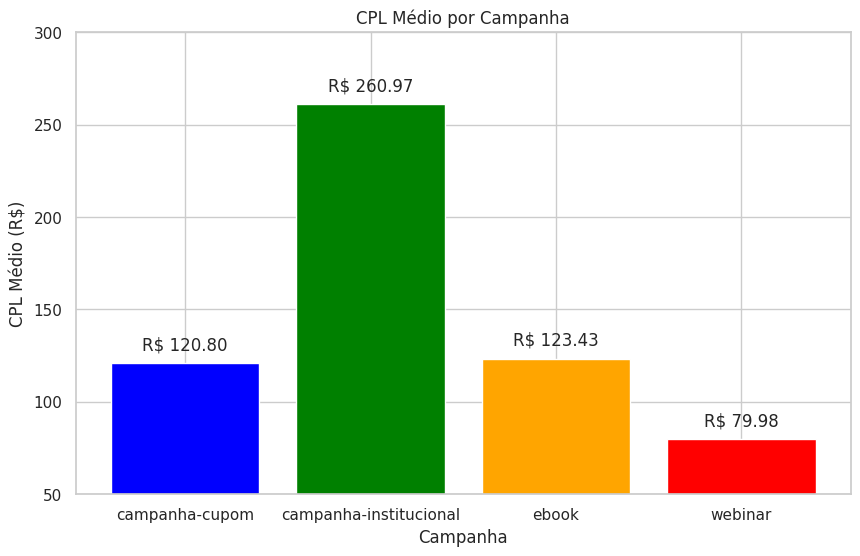

In [18]:
# Criando o DataFrame para o gráfico
media_cpl_por_campanha = cpl_medio_por_campanha.reset_index()
media_cpl_por_campanha.columns = ['Campanha', 'CPL Médio']

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(media_cpl_por_campanha['Campanha'], media_cpl_por_campanha['CPL Médio'], color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Campanha')
plt.ylabel('CPL Médio (R$)')
plt.title('CPL Médio por Campanha')
plt.ylim(50, 300)

# Adicionando os valores de CPL médio sobre as barras
for bar, valor in zip(bars, media_cpl_por_campanha['CPL Médio']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'R$ {valor:.2f}', ha='center', va='bottom')

plt.show()

In [19]:
# Identificando campanha com alta quantidade de leads e possivelmente baixa qualificação
campanha_alta_leads_baixa_qualificacao = cpl_medio_por_campanha.idxmax()
cpl_maximo = cpl_medio_por_campanha.max()
print(f"A campanha com potencial alto volume de leads e possivelmente baixa qualificação é \n '{campanha_alta_leads_baixa_qualificacao}' com CPL médio de aproximadamente R$ {cpl_maximo:.2f}.")

A campanha com potencial alto volume de leads e possivelmente baixa qualificação é 
 'campanha-institucional' com CPL médio de aproximadamente R$ 260.97.


## Impacto na tomada de decisão
   - **Alocação de Recursos**: Investir mais em campanhas com CPL mais baixo, como webinar, para maximizar o retorno sobre o investimento.
   - **Otimização de Estratégias**: Analisar campanhas com CPL alto, como institucional, para melhorar eficiência e qualidade dos leads.
   - **Maximização do ROI**: Utilizar CPL como indicador para decidir onde concentrar esforços de marketing e alcançar melhores resultados financeiros.

Esses números ajudam na gestão eficaz de campanhas, direcionando investimentos onde há potencial para maior eficiência e retorno.

Embora a campanha institucional possa gerar um volume aparentemente alto de leads, seu CPL elevado sugere que há espaço para melhorias na eficiência e na qualidade dos leads adquiridos através dessa campanha.

**ROI (Return on Investment)** é uma métrica financeira utilizada para calcular o retorno obtido sobre um investimento, expressando o lucro ou prejuízo em relação ao custo do investimento inicial.

**Cálculo do ROI**:

O ROI é calculado usando a fórmula:

  RO% = (Lucro/Investimento Total) * 100

Como o lucro é zero (assumindo que não temos informações sobre receita), o ROI será apenas o inverso do investimento total, indicando quanto foi recuperado em termos de investimento.

# Respondendo o Cliente

# O cliente pediu para desligarmos a campanha “campanha-institucional” sem uma justificativa baseada em dados, apenas porque ele "cansou" dessa campanha. Investigue se essa campanha tem performance, ou não, para ser desligada. A performance está diretamente ligada à qualidade dos leads gerados por ela.

## Quantidade de lead gerados  pela campanha 'campanha-institucional

In [20]:
df = verba.copy()
# Filtrando para obter apenas os dados da campanha-institucional
campanha_institucional = df[df['Campanha'] == 'campanha-institucional']

# Somando o total de leads gerados pela campanha-institucional
total_leads_campanha_institucional = campanha_institucional['Leads gerados'].sum()

print(f"Total de leads gerados pela campanha 'campanha-institucional': {total_leads_campanha_institucional}")

Total de leads gerados pela campanha 'campanha-institucional': 94


## **Heatmap**: Relacionamento entre Campanhas e Perfis de Leads

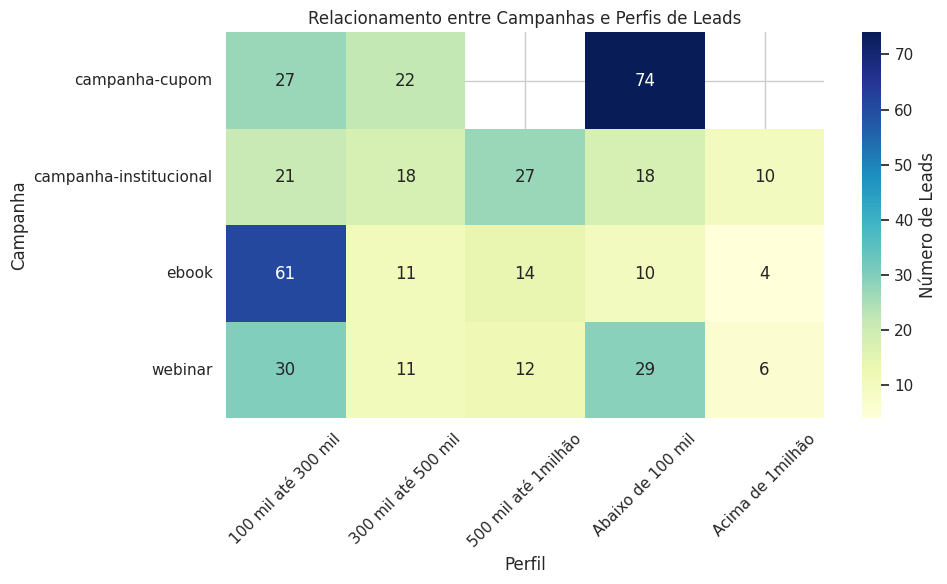

In [21]:
# Criando um pivot table para preparar os dados para o heatmap
heatmap_data = relacao_campanha_perfil.pivot(index='Campanha', columns='Perfil', values='Contagem')

# Criando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Número de Leads'})
plt.title('Relacionamento entre Campanhas e Perfis de Leads')
plt.xlabel('Perfil')
plt.ylabel('Campanha')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## **Gráfico de Pizza**: Distribuição de Perfis Atraídos pela Campanha Institucional

In [22]:
leads_gerados = pd.read_csv('leads_gerados.csv')

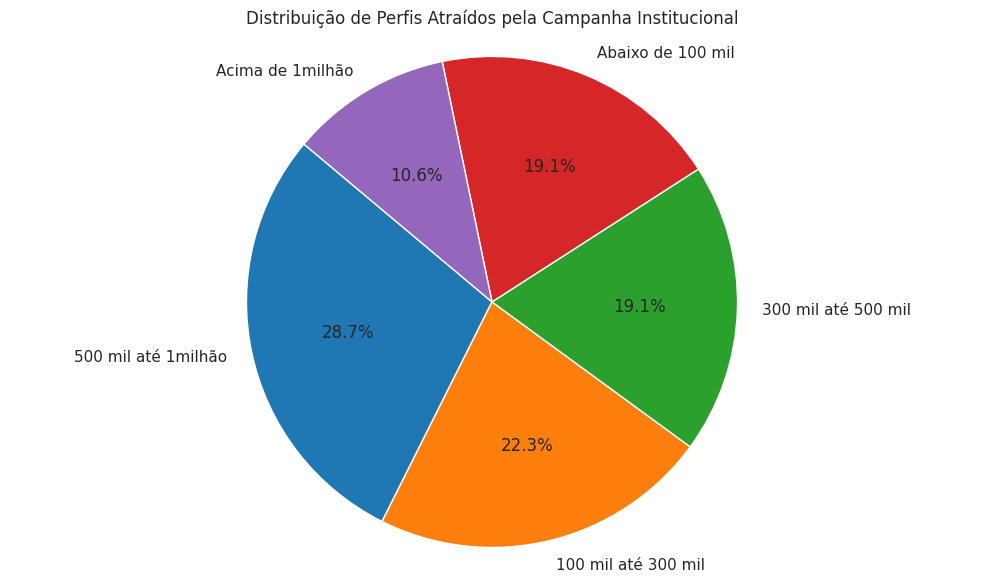

In [23]:
# Filtrar dados para a campanha 'campanha-institucional'
leads_campanha_institucional = leads_gerados[leads_gerados['Campanha'] == 'campanha-institucional']

# Contagem de leads por perfil
contagem_por_perfil = leads_campanha_institucional['Perfil'].value_counts()

# Calcular porcentagens
porcentagens = (contagem_por_perfil / contagem_por_perfil.sum()) * 100

# Cores personalizadas para os perfis
cores_personalizadas = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotar o gráfico de pizza
plt.figure(figsize=(10, 6))
plt.pie(porcentagens, labels=porcentagens.index, autopct='%1.1f%%', startangle=140, colors=cores_personalizadas)
plt.title('Distribuição de Perfis Atraídos pela Campanha Institucional')
plt.axis('equal')  # Garante que o gráfico de pizza seja desenhado como um círculo.
plt.tight_layout()
plt.show()


##**Gráfico de Pizza:** Comparando Campanhas

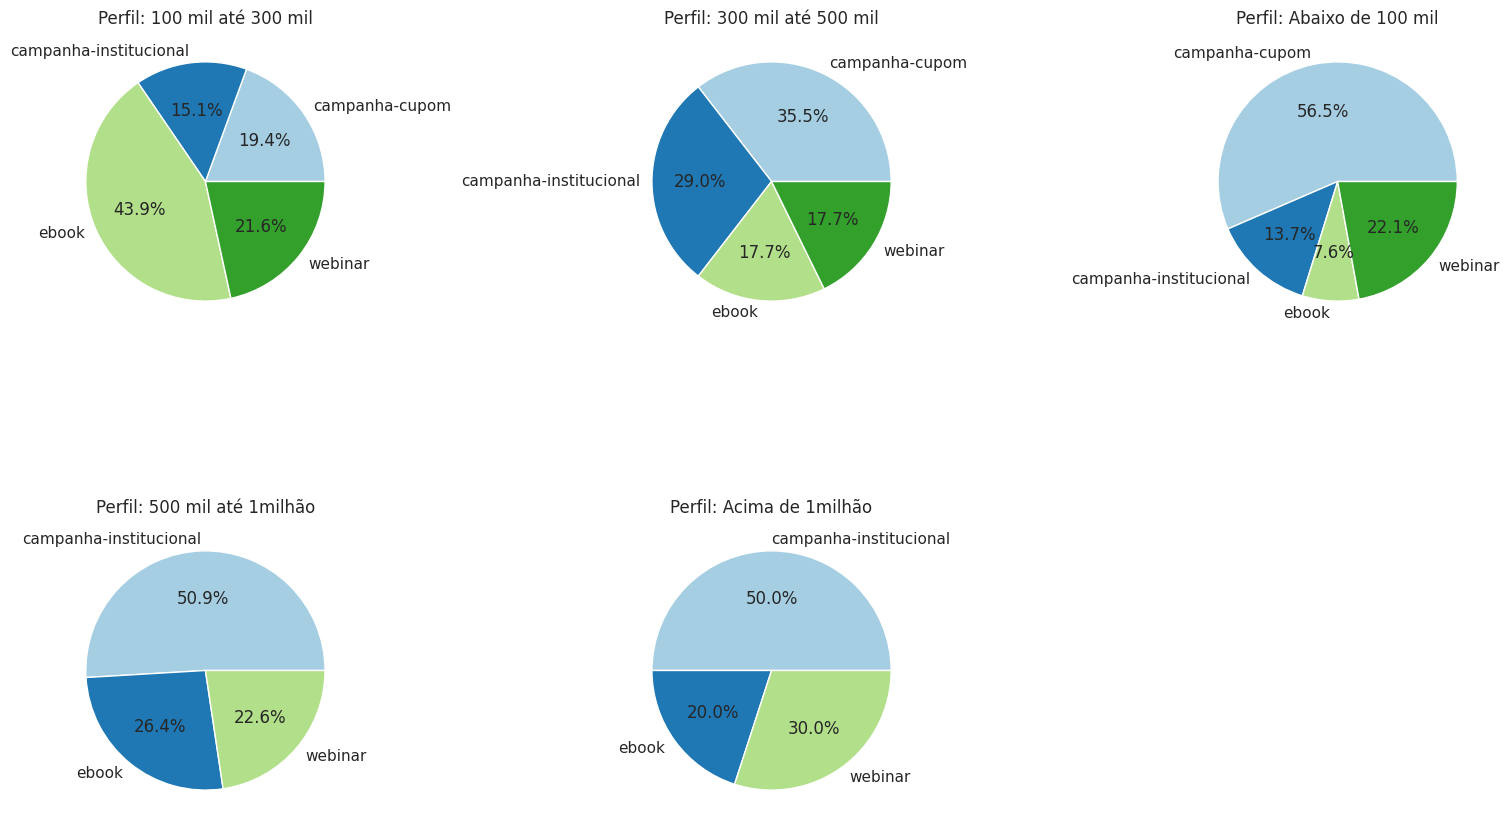

In [24]:
# Somar o total de leads por perfil
total_leads_por_perfil = relacao_campanha_perfil.groupby('Perfil')['Contagem'].sum().reset_index()
total_leads_por_perfil = total_leads_por_perfil.rename(columns={'Contagem': 'Total'})

# Mesclando os dados totais com o DataFrame original
relacao_campanha_perfil = relacao_campanha_perfil.merge(total_leads_por_perfil, on='Perfil')

# Calculando a porcentagem
relacao_campanha_perfil['Porcentagem'] = round(((relacao_campanha_perfil['Contagem'] / relacao_campanha_perfil['Total']) * 100), 2)

# Função para exibir tabela por perfil
def tabela_por_perfil(perfil):
    tabela = relacao_campanha_perfil[relacao_campanha_perfil['Perfil'] == perfil][['Campanha', 'Contagem', 'Porcentagem']]
    return tabela

# Função para criar gráfico de pizza
def grafico_por_perfil(perfil, ax):
    tabela = tabela_por_perfil(perfil)
    ax.pie(tabela['Porcentagem'], labels=tabela['Campanha'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
    ax.set_title(f'Perfil: {perfil}')

# Exibindo tabelas e gráficos para cada perfil
perfis = relacao_campanha_perfil['Perfil'].unique()

# Configuração dos subplots (2 linhas, 3 colunas)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Ajustando os eixos
axs = axs.flatten()

for ax, perfil in zip(axs, perfis):
    grafico_por_perfil(perfil, ax)

# Remover qualquer eixo sobrando
for ax in axs[len(perfis):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


# Analisando os dados, quais campanhas tem funcionado melhor para esse cliente? Gere uma ideia para uma nova campanha, a partir da análise de relatório. Algo que pode te ajudar é analisar qual o tema das campanhas que mais geraram leads qualificados.


1. **Campanhas que funcionam melhor em termos de CPL e geração de leads qualificados e super qualificados:**
   - **CPL mais baixo:** A campanha 'webinar' apresenta o CPL mais baixo, o que indica um bom desempenho nesse aspecto.
   - **Leads Qualificados e Super Qualificados:** A campanha 'ebook' se destaca com uma porcentagem significativa de leads qualificados (72%) e super qualificados (18%), totalizando 90% de leads de qualidade.

2. **Melhorar a performance de cada campanha:**
   - **Campanha-cupom:** Considerando que essa campanha tem uma quantidade considerável de leads desclassificados, uma estratégia pode ser melhorar a segmentação e personalização dos anúncios para atrair um público mais qualificado.
   - **Campanha-institucional:** Embora tenha uma boa quantidade de leads qualificados e super qualificados, poderia-se explorar melhor a diversificação das mídias ou ajustar a mensagem para atrair um volume maior de leads qualificados.
   - **Ebook:** Fortalecer ainda mais o conteúdo oferecido, explorando novos canais de distribuição ou otimizando a captação através de ads.
   - **Webinar:** Aumentar o foco na conversão de leads desclassificados em qualificados, talvez através de follow-ups mais direcionados pós-webinar.

3. **Ideia para uma nova campanha:**
   - Considerando o sucesso da campanha 'ebook' em gerar leads qualificados e super qualificados, uma nova campanha poderia explorar a criação de conteúdos educativos mais aprofundados, como uma série de webinars ou workshops virtuais, com temas específicos relacionados ao interesse do público-alvo. Isso poderia atrair um público mais engajado e predisposto a se qualificar como leads de alta qualidade.

Essas sugestões visam aproveitar os pontos fortes das campanhas atuais e explorar novas oportunidades para melhorar os resultados gerais do marketing digital.